### Youtube "https://www.youtube.com/watch?v=o-zM8onpQZY&t=870s"

<p> Source NLTK : "https://www.nltk.org/_modules/nltk/sentiment/vader.html" </p>

In [14]:
%pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG', 'FB']

In [32]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
    
    


In [33]:
amzn_data = news_tables ['AMZN']
amzn_rows = amzn_data.findAll ('tr')
#print (amzn_rows)

In [34]:
for index, row in enumerate (amzn_rows):
    title = row.a.text 
    Timestamp = row.td.text
    print (Timestamp + " " + title)

Jan-17-22 01:01PM   11 Best Delivery Stocks To Buy Now
11:58AM   835 Reasons to Invest in Netflix Stock Right Now
10:46AM   Amazon reverses decision to ban customers from using Visa credit cards
10:45AM   Amazon will continue to accept Visa credit cards in the UKfor now
09:47AM   VPN deals for January: Pay less for privacy with discounts on ExpressVPN, NordVPN and more
08:48AM   Fundsmith LLP: The Purchase of Amazon (AMZN) has Attracted a Lot of Attention
08:45AM   Should You Consider Investing in Amazon (AMZN)?
08:45AM   Here's an Under-the-Radar Strategy for Picking Winning Retail Real Estate Investment Trusts
08:25AM   Tech Stocks Roundup: Well-Known Value Investor Likes Google, Meta, Netflix
07:58AM   Amazon Scraps Plan to Stop Accepting Visas U.K. Credit Card
07:09AM   Musk and Bezos among world's 10 richest men who doubled their wealth in pandemic
07:00AM   4 Robots That Can Shape the Future of Amazon's Fulfillment Centers
06:35AM   Reversing stance, Amazon says it will keep acce

In [35]:
parsed_data = []

In [36]:
for ticker,news_table in news_tables.items() :
    
    for row in news_table.findAll('tr'):
        title = row.a.get_text()
        date_data = row.td.text.split (' ')

        if len (date_data) == 1 :
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        
        parsed_data.append ([ticker,date,time,title])

print (parsed_data)
        


[['AMZN', 'Jan-17-22', '01:01PM\xa0\xa0', '11 Best Delivery Stocks To Buy Now'], ['AMZN', 'Jan-17-22', '11:58AM\xa0\xa0', '835 Reasons to Invest in Netflix Stock Right Now'], ['AMZN', 'Jan-17-22', '10:46AM\xa0\xa0', 'Amazon reverses decision to ban customers from using Visa credit cards'], ['AMZN', 'Jan-17-22', '10:45AM\xa0\xa0', 'Amazon will continue to accept Visa credit cards in the UKfor now'], ['AMZN', 'Jan-17-22', '09:47AM\xa0\xa0', 'VPN deals for January: Pay less for privacy with discounts on ExpressVPN, NordVPN and more'], ['AMZN', 'Jan-17-22', '08:48AM\xa0\xa0', 'Fundsmith LLP: The Purchase of Amazon (AMZN) has Attracted a Lot of Attention'], ['AMZN', 'Jan-17-22', '08:45AM\xa0\xa0', 'Should You Consider Investing in Amazon (AMZN)?'], ['AMZN', 'Jan-17-22', '08:45AM\xa0\xa0', "Here's an Under-the-Radar Strategy for Picking Winning Retail Real Estate Investment Trusts"], ['AMZN', 'Jan-17-22', '08:25AM\xa0\xa0', 'Tech Stocks Roundup: Well-Known Value Investor Likes Google, Meta, 

#### Command prompt
<p> !pip install nltk </p>
<p> nltk.download ('veder lexicon') <p>

In [37]:
df = pd.DataFrame (parsed_data,columns = ['ticker','date','time','title'])

In [38]:
df.head()

,ticker,date,time,title
0,AMZN,Jan-17-22,01:01PM,11 Best Delivery Stocks To Buy Now
1,AMZN,Jan-17-22,11:58AM,835 Reasons to Invest in Netflix Stock Right Now
2,AMZN,Jan-17-22,10:46AM,Amazon reverses decision to ban customers from...
3,AMZN,Jan-17-22,10:45AM,Amazon will continue to accept Visa credit car...
4,AMZN,Jan-17-22,09:47AM,VPN deals for January: Pay less for privacy wi...


In [39]:
vader = SentimentIntensityAnalyzer()

In [40]:
print (vader.polarity_scores(" I don't think Apple a good company. I think they will do poolry this quarter"))

{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.3412}


In [41]:
print (vader.polarity_scores(" I think Apple is a bad company and they will fail this quarter"))

{'neg': 0.438, 'neu': 0.562, 'pos': 0.0, 'compound': -0.7906}


In [42]:
f = lambda title: vader.polarity_scores(title)['compound']

In [43]:
df ['compound'] = df['title'].apply(f)

In [44]:
df.head()

,ticker,date,time,title,compound
0,AMZN,Jan-17-22,01:01PM,11 Best Delivery Stocks To Buy Now,0.6369
1,AMZN,Jan-17-22,11:58AM,835 Reasons to Invest in Netflix Stock Right Now,0.0000
2,AMZN,Jan-17-22,10:46AM,Amazon reverses decision to ban customers from...,-0.0772
3,AMZN,Jan-17-22,10:45AM,Amazon will continue to accept Visa credit car...,0.7096
4,AMZN,Jan-17-22,09:47AM,VPN deals for January: Pay less for privacy wi...,-0.1027


In [45]:
df['date'] = pd.to_datetime (df.date).dt.date

In [46]:
plt.figure (figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [47]:
mean_df = df.groupby (['ticker','date']).mean ()

In [48]:
mean_df

compound
ticker date                
AMZN   2022-01-12  0.197547
       2022-01-13  0.140929
       2022-01-14  0.107890
       2022-01-15 -0.000933
       2022-01-16  0.247360
       2022-01-17  0.364294
FB     2022-01-11  0.064087
       2022-01-12 -0.131892
       2022-01-13  0.027917
       2022-01-14 -0.014804
       2022-01-15 -0.148000
       2022-01-16  0.403100
       2022-01-17  0.448220
GOOG   2022-01-11  0.182617
       2022-01-12  0.087082
       2022-01-13  0.109565
       2022-01-14  0.058164
       2022-01-15 -0.526700
       2022-01-16  0.598400
       2022-01-17  0.319610

In [49]:
mean_df = mean_df.unstack()
mean_df = mean_df.xs ('compound',axis="columns").transpose()
mean_df

ticker,AMZN,FB,GOOG
date,,,
2022-01-11,NaN,0.064087,0.182617
2022-01-12,0.197547,-0.131892,0.087082
2022-01-13,0.140929,0.027917,0.109565
2022-01-14,0.107890,-0.014804,0.058164
2022-01-15,-0.000933,-0.148000,-0.526700
2022-01-16,0.247360,0.403100,0.598400
2022-01-17,0.364294,0.448220,0.319610


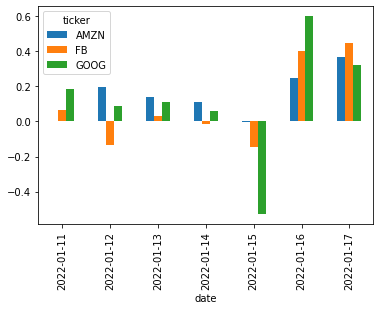

In [51]:
mean_df.plot (kind='bar')
plt.show() 